In [218]:
!pip install tensorflow opencv-python matplotlib

In [219]:
pip list


Package                       Version
----------------------------- ---------------
absl-py                       2.1.0
aiobotocore                   2.5.0
aiofiles                      22.1.0
aiohttp                       3.8.5
aioitertools                  0.7.1
aiosignal                     1.2.0
aiosqlite                     0.18.0
alabaster                     0.7.12
anaconda-anon-usage           0.4.2
anaconda-catalogs             0.2.0
anaconda-client               1.12.1
anaconda-cloud-auth           0.1.3
anaconda-navigator            2.5.0
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.3
astroid                       2.14.2
astropy                       5.1
asttokens                     2.0.5
astunparse                    1.6.3
async-timeout                 4.0.2
atomicwrites                  1.4.0
attrs     

In [220]:
import tensorflow as tf
import os

In [221]:
import cv2
import imghdr
from matplotlib import pyplot as plt

In [222]:
data_dir = 'data'
os.listdir(data_dir)

['Bulging_eyes',
 'Cataract_eyes',
 'Cellulitis_eye',
 'Crossed_eyes',
 'keratoconus_eye',
 'Normal_eye',
 'Uveitis_eyes']

In [223]:
image_exts = ['jpeg','jpg','bmp','png']

In [224]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('image not in ext list{}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print("Issue with image{}".format(image_path))


In [225]:
tf.data.Dataset??

In [226]:
import numpy as np
from matplotlib import pyplot as plt

In [227]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 451 files belonging to 7 classes.


In [228]:
data_iterator = data.as_numpy_iterator()

In [229]:
data_iterator

NumpyIterator(iterator=<tensorflow.python.data.ops.iterator_ops.OwnedIterator object at 0x000001A83E5A80D0>)

In [230]:
batch = data_iterator.next()

In [231]:
len(batch)

2

In [232]:
batch[0].shape

(32, 256, 256, 3)

In [233]:
# Class 0 = Bulging eyes
# Class 1 = Cataract eyes
# Class 2 = Crossed eyes
# Class 3 = Uveitis eyes
batch[1]

array([2, 4, 0, 4, 3, 6, 3, 4, 4, 1, 0, 3, 2, 6, 0, 6, 3, 3, 4, 3, 5, 1,
       6, 1, 3, 6, 4, 2, 3, 0, 6, 5])

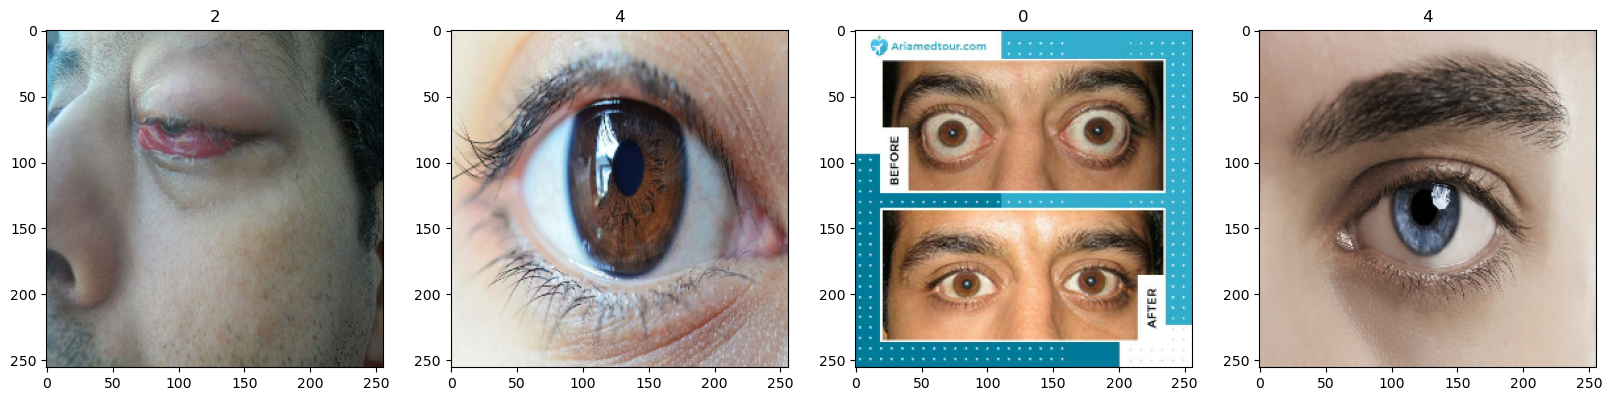

In [234]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [235]:
data = data.map(lambda x,y: (x/255, y))

In [236]:
scaled_iterator = data.as_numpy_iterator()

In [237]:
batch = scaled_iterator.next()

In [238]:
batch[0].max()

1.0

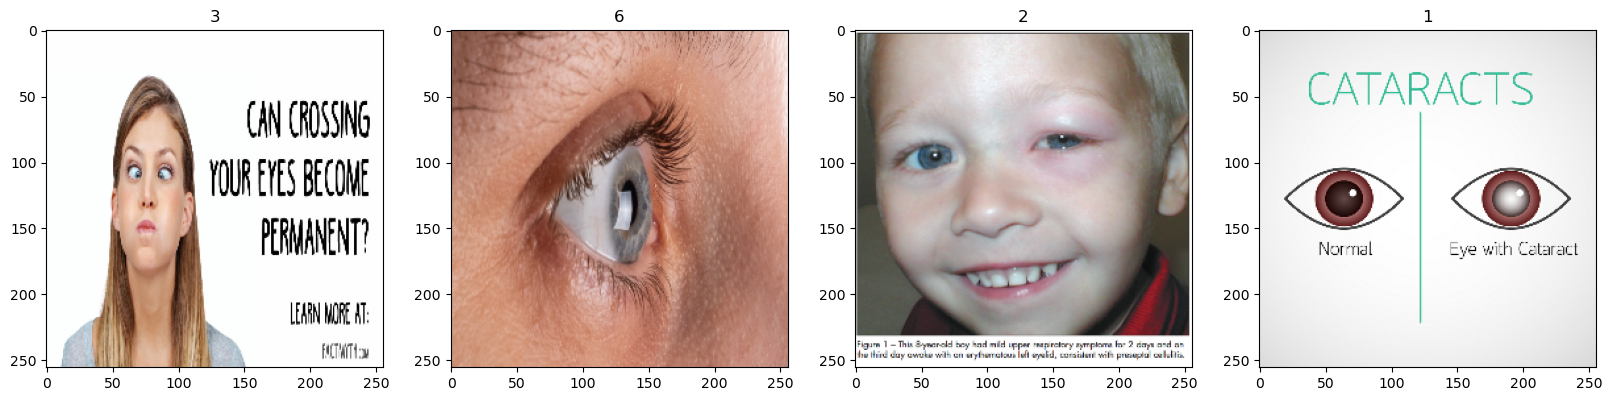

In [239]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [240]:
len(data)

15

In [241]:
15*.14

2.1

In [242]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)

In [243]:
test_size+train_size+val_size

15

In [244]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [302]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [304]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [305]:
model = Sequential()

In [306]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dense(7, activation='softmax'))

In [307]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [250]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)               │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 7)              │         1,799 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,698,167 (14.11 MB)

 Trainable params: 3,698,167 (14.11 MB)

 Non-trainable params: 0 (0.00 B)

In [251]:
logdir = 'logs'

In [252]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [253]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 11s 401ms/step - accuracy: 0.1582 - loss: 2.1695 - val_accuracy: 0.1797 - val_loss: 1.9231
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 415ms/step - accuracy: 0.2221 - loss: 1.8879 - val_accuracy: 0.3516 - val_loss: 1.7526
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 404ms/step - accuracy: 0.3446 - loss: 1.7311 - val_accuracy: 0.3281 - val_loss: 1.6871
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 434ms/step - accuracy: 0.4246 - loss: 1.5986 - val_accuracy: 0.5859 - val_loss: 1.3562
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 365ms/step - accuracy: 0.5430 - loss: 1.3793 - val_accuracy: 0.6719 - val_loss: 1.1115
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 422ms/step - accuracy: 0.6350 - loss: 1.1855 - val_accuracy: 0.7500 - val_loss: 0.7818
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 432ms/step - accuracy: 0.7210 - loss: 0.8959 - val_accuracy: 0.8516 - val_loss: 0.6634
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 389ms/step - accuracy: 0.8592 - loss: 0.5481 - val_accuracy: 0

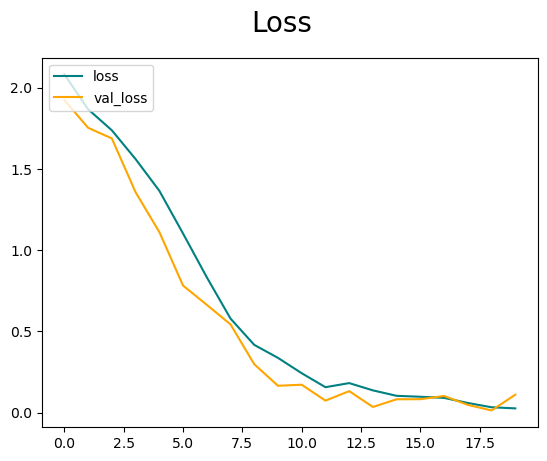

In [254]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss',fontsize=20)
plt.legend(loc="upper left")
plt.show()

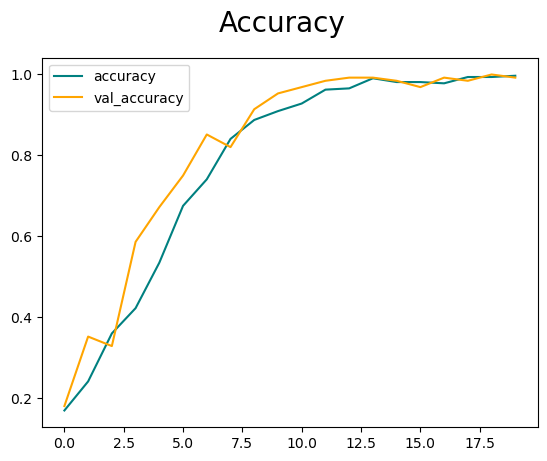

In [255]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy',fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [256]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy


In [257]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()


In [258]:
len(test)

1

In [293]:
num_classes=7
for batch in test.as_numpy_iterator(): 
    X, y = batch
    y = tf.one_hot(y, depth=num_classes)  # Convert y to one-hot encoding
    yhat = model.predict(X)
    
    # Assuming yhat is in the shape [batch_size, num_classes]
    yhat_argmax = tf.argmax(yhat, axis=1)  # Convert yhat to one-hot encoding
    yhat_onehot = tf.one_hot(yhat_argmax, depth=num_classes)
    
    pre.update_state(y, yhat_onehot)
    re.update_state(y, yhat_onehot)
    acc.update_state(y, yhat_onehot)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


In [294]:
print(f'Precision: {pre.result().numpy()}, Recall: {re.result().numpy()}, Accuracy: {acc.result().numpy()}')

Precision: 1.0, Recall: 1.0, Accuracy: 1.0


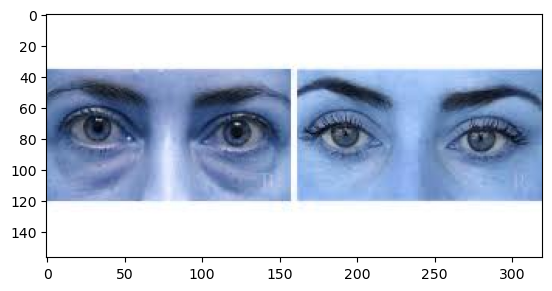

In [295]:
img = cv2.imread('bulging_eye.jpeg')
plt.imshow(img)
plt.show()

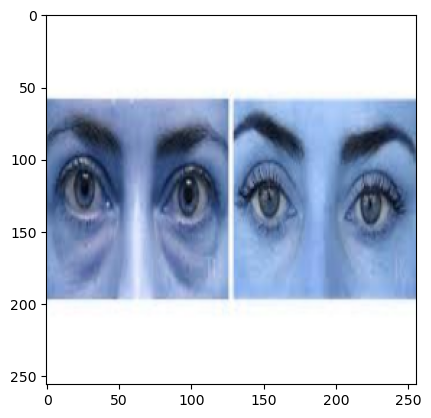

In [296]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [297]:
np.expand_dims(resize, 0).shape

(1, 256, 256, 3)

In [298]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


In [299]:
yhat

array([[4.9968031e-03, 8.4551662e-04, 2.5101007e-08, 1.2417644e-04,
        3.2774564e-02, 4.6706708e-07, 9.6125853e-01]], dtype=float32)

In [300]:
m = np.argmax(yhat)
print(m)

6


In [301]:
if m==0:
    print("bulging eye")
elif m==1:
    print("cataract eye")
elif m==2:
    print("Cellulitis eye")
elif m==3:
    print("Crossed eye")
elif m==4:
    print("Normal eye")
elif m==5:
    print("Uveitis eye")
else:
    print("ke")

ke
